**A data engineer decided to build a simple movie recommendation system.**

**Dataset : “u.data” and “Movie_Titles.csv”**

**Build a recommendation system that simulates the following tasks.**

**a)	Open the two files “u.data”, “Movie_Titles.csv” and merge the two files. (5 marks)**

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
column_names = ["user_id", "item_id", "rating", "timestamp"]
ratings = pd.read_csv("../Lab_Exam_Dataset/u.data", sep="\t", names=column_names)
ratings.head()

user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [14]:
movie_titles = pd.read_csv("../Lab_Exam_Dataset/Movie_Titles.csv")
movie_titles.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

In [15]:
df = pd.merge(ratings, movie_titles, on="item_id")
print(df.head().to_markdown(index=False))

|   user_id |   item_id |   rating |   timestamp | title        |
|----------:|----------:|---------:|------------:|:-------------|
|       196 |       242 |        3 |   881250949 | Kolya (1996) |
|        63 |       242 |        3 |   875747190 | Kolya (1996) |
|       226 |       242 |        5 |   883888671 | Kolya (1996) |
|       154 |       242 |        3 |   879138235 | Kolya (1996) |
|       306 |       242 |        5 |   876503793 | Kolya (1996) |


**b)	Creating mean ratings and number of rating of the movie based on title. (5 marks)**

In [17]:
movie_ratings = df.groupby("title")["rating"].agg(["mean", "count"])

# Renaming the columns for clarity
movie_ratings = movie_ratings.rename(
    columns={"mean": "mean_rating", "count": "rating_count"}
)

# Sorting the DataFrame by rating count in descending order
movie_ratings = movie_ratings.sort_values("rating_count", ascending=False)

# Printing the resulting DataFrame
movie_ratings.head(10)

mean_rating  rating_count
title                                                   
Star Wars (1977)                  4.358491           583
Contact (1997)                    3.803536           509
Fargo (1996)                      4.155512           508
Return of the Jedi (1983)         4.007890           507
Liar Liar (1997)                  3.156701           485
English Patient, The (1996)       3.656965           481
Scream (1996)                     3.441423           478
Toy Story (1995)                  3.878319           452
Air Force One (1997)              3.631090           431
Independence Day (ID4) (1996)     3.438228           429

**c)	Display a joint plot for mean ratings and number of rating. (5 marks)**

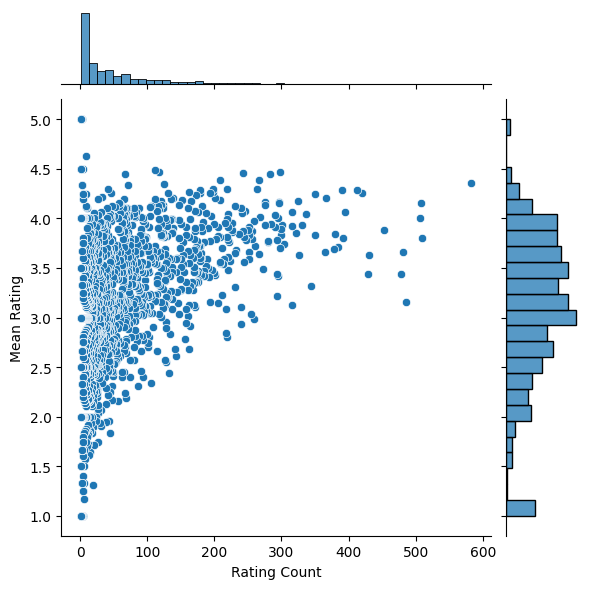

In [21]:
# Plotting the joint plot
sns.jointplot(x="rating_count", y="mean_rating", data=movie_ratings, kind="scatter")

# Adding labels to the axes
plt.xlabel("Rating Count")
plt.ylabel("Mean Rating")

# Displaying the plot
plt.show()

**d)	Construct a utility matrix for userid and title of the movie. (5 marks)**

In [22]:
utility_matrix = df.pivot_table(values="rating", index="user_id", columns="title")

# Filling missing values with 0 (if a user hasn't rated a movie)
utility_matrix = utility_matrix.fillna(0)

utility_matrix

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              0.0           0.0                    2.0   
2                              0.0           0.0                    0.0   
3                              0.0           0.0                    0.0   
4                              0.0           0.0                    0.0   
5                              0.0           0.0                    2.0   
...                            ...           ...                    ...   
939                            0.0           0.0                    0.0   
940                            0.0           0.0                    0.0   
941                            0.0           0.0                    0.0   
942                            0.0           0.0                    0.0   
943                            0.0           0.0                    0.0   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
1                        5.0         0.0                          0.0   
2                        0.0         0.0                          0.0   
3                        0.0         2.0                          0.0   
4                        0.0         0.0                          0.0   
5                        0.0         0.0                          0.0   
...                      ...         ...                          ...   
939                      0.0         0.0                          0.0   
940                      0.0         0.0                          0.0   
941                      0.0         0.0                          0.0   
942                      0.0         0.0                          0.0   
943                      0.0         0.0                          2.0   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
1                                        3.0                           4.0   
2                                        0.0                           0.0   
3                                        0.0                           0.0   
4                                        0.0                           0.0   
5                                        0.0                           4.0   
...                                      ...                           ...   
939                                      0.0                           0.0   
940                                      0.0                           0.0   
941                                      0.0                           0.0   
942                                      0.0                           3.0   
943                                      0.0                           0.0   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
1                                                0.0                   0.0   
2                                                1.0                   0.0   
3                                                0.0                   0.0   
4                                                0.0                   0.0   
5                                                0.0                   0.0   
...                                              ...                   ...   
939                                              0.0                   0.0   
940                                              0.0                   0.0   
941                                              0.0                   0.0   
942                                              0.0                   3.0   
943                                              0.0                   0.0   

title    ...  Wyatt Earp (1994)  Yankee Zulu

**e)	Create a similar recommendation for the movie “Fargo (1996)” using correlation. (5 marks)**

In [49]:
# A simple way to compute Pearson Correlation
def pearsonR(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c**2) * np.sum(s2_c**2))


# A function to make N recommendations based on Pearson Correlation.
# The parameters here are: movie name, matrix name and number of recommendations.
def recommend(movie, M, n=None):
    reviews = []
    for title in M.columns:
        if title == movie:
            continue
        cor = pearsonR(M[movie], M[title])
        if np.isnan(cor):
            continue
        else:
            reviews.append((title, cor))

    reviews.sort(key=lambda tup: tup[1], reverse=True)
    if n:
        return reviews[:n]
    else:
        return reviews

In [50]:
movie_recommendation = recommend("Fargo (1996)", utility_matrix, 20)
sorted_data = sorted(movie_recommendation, key=lambda x: x[1], reverse=True)

for item in sorted_data:
    print(item)

('Twelve Monkeys (1995)', 0.44805930902046615)
('Leaving Las Vegas (1995)', 0.4046314003531434)
('Lone Star (1996)', 0.3989988617550581)
('Dead Man Walking (1995)', 0.3905697107046057)
('Trainspotting (1996)', 0.3862739225801272)
('Usual Suspects, The (1995)', 0.3785940109808688)
('Mighty Aphrodite (1995)', 0.3592535631624837)
('Pulp Fiction (1994)', 0.35771157875078746)
('Big Night (1996)', 0.35493001092578325)
('Godfather, The (1972)', 0.3452177565203293)
('Silence of the Lambs, The (1991)', 0.3398023002897603)
('Raising Arizona (1987)', 0.33544296457722056)
('People vs. Larry Flynt, The (1996)', 0.3326204322870079)
('Jerry Maguire (1996)', 0.3316200892475761)
('Reservoir Dogs (1992)', 0.33111940689927405)
('Secrets & Lies (1996)', 0.32613864181390256)
('Birdcage, The (1996)', 0.3227635679655094)
('Bound (1996)', 0.3170461739528198)
('Sling Blade (1996)', 0.3149019334408343)
('Shawshank Redemption, The (1994)', 0.314245974238089)


**f)	Display the top five films whose total ratings are above 30 in relation with “Fargo (1996)”. (10 marks)**

In [56]:
sorted_data = sorted(
    recommend("Fargo (1996)", utility_matrix), key=lambda x: x[1], reverse=True
)
movies = [x[0] for x in sorted_data]

In [65]:
total_ratings = utility_matrix.sum()

filtered_movies = (
    total_ratings[(total_ratings > 30)]
    .reset_index()
    .rename(columns={0: "Total Ratings"})
)

In [72]:
filtered_movies = filtered_movies[
    (filtered_movies["title"].isin(movies)) & (filtered_movies["title"] != "Fargo (1996)")
]

In [73]:
filtered_movies.sort_values(by="Total Ratings", ascending=False).iloc[:5]

title  Total Ratings
940                Star Wars (1977)         2541.0
823       Return of the Jedi (1983)         2032.0
225                  Contact (1997)         1936.0
800  Raiders of the Lost Ark (1981)         1786.0
421           Godfather, The (1972)         1769.0